# KMeans Clustering: Food Recommender 

This is a mini-project created in response to the "Microsoft Azure Scholarship Project Showcase Challenge" from what should encompass quite a lot of factors for a food recommender project.

* Here, only the food choices are used to determine what is termed in this project "safe food" from food choices of various killer-diseases.

* The reasoning behind this project is that most daibetic patients often suffer from other forms of diseases associated with diabetes. Diseases such as high blood pressure, liver disease, stroke, 
    etc and each of these diseases require that patients manage their health by making good food choices that do not aggrevate the another disease while control the other.
    
* This is dedicated to the memory of my Father, Sir James Olisah, who died of diabtes, liver failure, kidney failure and high blood pressure and for years prior to his death battled with making the right food choices.

## importing important libraries

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text  import CountVectorizer
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import KMeans
%matplotlib inline

In [9]:
#load data
#Each file comprises of what is termed "safe food" which includes fruits, vegetables and main meals, for each disease. 
dia = pd.read_csv('../Chollette C. Olisah/input/diabetes.csv',encoding='latin1')
heart = pd.read_csv('../Chollette C. Olisah/input/heart_disease.csv',encoding='latin1')
hbp = pd.read_csv('../Chollette C. Olisah/input/high_blood_pressure.csv',encoding='latin1')
liver = pd.read_csv('../Chollette C. Olisah/input/liver_disease.csv',encoding='latin1')
stroke = pd.read_csv('../Chollette C. Olisah/input/stroke.csv',encoding='latin1')
kidney = pd.read_csv('../Chollette C. Olisah/input/kidney_disease.csv',encoding='latin1')

#preview diabetes data
dia.head()


,Fruits,vegetables,Food
0,apple,carrots,whole grain
1,avocados,peas,oatmeal
2,bananas,broccoli,quinoa
3,berries,tomatoes,millet
4,cherries,asparagus,bulgur


## Data preparation
For each disease:
1. Convert pandas file to a list. 
2. Remove NaN value, which stands for "not a number". 
3. Join food separated by space with '-'. E.g., whole grain should be considered as a word as follows: whole-grain, otherwise whole will be a word of its own as well as grain.
4. Merge individual list of food options for various diseases into a single array.
5. Finally, Use lemmatize method to remove occurrences of 's' at the end of the string. This is due the fact that different blogs and websites use different styles for food entries recommended for the diseases under consideration.

In [10]:
#Function to collapse an array into one dimensionon. 
def flatten(iterable):
    for item in iterable:
        if isinstance(item,str): 
            yield item
        else:
            try:
                yield from flatten(item)
            except TypeError:
                yield item

In [11]:
dia = dia.to_numpy() #convert pandas data to numpy array     
dia = list(flatten(dia)) #after flatten, convert the array into a list
dia=[x for x in dia if str(x) !='nan'] #Remove nan
dianew = []
for i in dia:
    m = "_".join(i.split()) #method to join strings separated by space using '-'.
    dianew.append(m)


heart = heart.to_numpy() #convert pandas data to numpy array     
heart = list(flatten(heart)) #use flatten function to convert the array into a list
heart=[x for x in heart if str(x) !='nan'] #Remove nan
heartnew = []
for i in heart:
    m = "_".join(i.split())
    heartnew.append(m)


hbp = hbp.to_numpy() #convert pandas data to numpy array     
hbp = list(flatten(hbp)) #use flatten function to convert the array into a list
hbp=[x for x in hbp if str(x) !='nan'] #Remove nan
hbpnew = []
for i in hbp:
    m = "_".join(i.split())
    hbpnew.append(m)

liver = liver.to_numpy() #convert pandas data to numpy array     
liver = list(flatten(liver)) #use flatten function to convert the array into a list
liver=[x for x in liver if str(x) !='nan'] #Remove nan
livernew = []
for i in liver:
    m = "_".join(i.split())
    livernew.append(m)

stroke = stroke.to_numpy() #convert pandas data to numpy array     
stroke = list(flatten(stroke)) #use flatten function to convert the array into a list
stroke=[x for x in stroke if str(x) !='nan'] #Remove nan
strokenew = []
for i in stroke:
    m = "_".join(i.split())
    strokenew.append(m)

kidney = kidney.to_numpy() #convert pandas data to numpy array     
kidney = list(flatten(kidney)) #use flatten function to convert the array into a list
kidney=[x for x in kidney if str(x) !='nan'] #Remove nan
kidneynew = []
for i in kidney:
    m = "_".join(i.split())
    kidneynew.append(m)

In [12]:
#Merge the list of food choices of the various diseases into a single array 
datanew = np.array(list(zip(dianew,heartnew,hbpnew,livernew,strokenew,kidneynew)))
print(datanew)

[['apple' 'apple' 'apple' 'apple' 'apple' 'red_grapes']
 ['carrots' 'beet_greens' 'beet_greens' 'beet_greens' 'carrots'
  'cauliflower']
 ['whole_grain' 'Brown_rice' 'potato' 'potato' 'lean_meat' 'buckwheat']
 ['avocados' 'avocados' 'apricot' 'apricot' 'avocados' 'pineapple']
 ['peas' 'broccoli' 'broccoli' 'broccoli' 'peas' 'garlic']
 ['oatmeal' 'oatmeal' 'mushroom' 'mushroom' 'potato' 'bulgur']
 ['bananas' 'bananas' 'banana' 'banana' 'bananas' 'cranberries']
 ['broccoli' 'carrots' 'carrots' 'carrots' 'broccoli' 'olive_oil']
 ['quinoa' 'quinoa' 'sweet_potato' 'sweet_potato' 'egg' 'white_rice']
 ['berries' 'berries' 'dates' 'dates' 'berries' 'apple']
 ['tomatoes' 'collards' 'collards' 'collards' 'tomatoes' 'cabbage']
 ['millet' 'sweet_potato' 'whole_grain_rice' 'whole_grain_rice'
  'whole_grain_cereal' 'whole_grain_pasta']
 ['cherries' 'cherries' 'grapes' 'grapes' 'cherries' 'strawberries']
 ['asparagus' 'green_beans' 'green_beans' 'green_beans' 'asparagus'
  'bell_peppers']
 ['bulgur' 

In [13]:
lemmatizer = WordNetLemmatizer() 
datanew = [lemmatizer.lemmatize(k) for k in datanew.ravel()]
print(datanew) 

['apple', 'apple', 'apple', 'apple', 'apple', 'red_grapes', 'carrot', 'beet_green', 'beet_green', 'beet_green', 'carrot', 'cauliflower', 'whole_grain', 'Brown_rice', 'potato', 'potato', 'lean_meat', 'buckwheat', 'avocado', 'avocado', 'apricot', 'apricot', 'avocado', 'pineapple', 'pea', 'broccoli', 'broccoli', 'broccoli', 'pea', 'garlic', 'oatmeal', 'oatmeal', 'mushroom', 'mushroom', 'potato', 'bulgur', 'banana', 'banana', 'banana', 'banana', 'banana', 'cranberry', 'broccoli', 'carrot', 'carrot', 'carrot', 'broccoli', 'olive_oil', 'quinoa', 'quinoa', 'sweet_potato', 'sweet_potato', 'egg', 'white_rice', 'berry', 'berry', 'date', 'date', 'berry', 'apple', 'tomato', 'collard', 'collard', 'collard', 'tomato', 'cabbage', 'millet', 'sweet_potato', 'whole_grain_rice', 'whole_grain_rice', 'whole_grain_cereal', 'whole_grain_pasta', 'cherry', 'cherry', 'grape', 'grape', 'cherry', 'strawberry', 'asparagus', 'green_bean', 'green_bean', 'green_bean', 'asparagus', 'bell_pepper', 'bulgur', 'whole_grai

## Feature Engineering

##### Convert food items into vectors using CountVectorizer() (AKA One-Hot Encoding)
CountVectorizer() is prefered here because it counts the word frequencies and as such rends itself more appropriate for the given problem. 
Intuitvely, it is assumed that the food which occur more frequent from each disease food choices to the other are the "safe food". 

In [14]:
# initialize CountVectorizer and use it to transform the data to a vector.
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(datanew)
words = vectorizer.get_feature_names()

## KMEANS Clustering

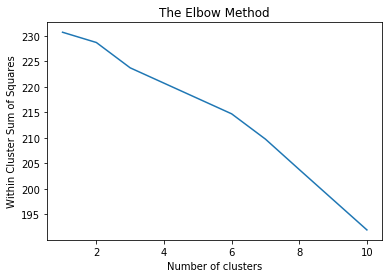

In [15]:
#Using the ElBOW method to identify the true clusters
#one can observe "3 clusters", though it is not a clear point.
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=50,n_init=1,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.savefig('elbow.png')
plt.show()

In [16]:
#Let's us choose 3 clusters, where it can be assumed that the first cluster is the "safe food".
model = KMeans(n_clusters=3, init='k-means++', max_iter=50, n_init=1)
km = model.fit(X)

In [17]:
# This illustrates all entry of food for different clusters.
common_words = model.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : apple, strawberry, carrot, grape, whole_grain_pasta, peach, banana, broccoli, green_bean, orange, spinach, cabbage, salmon, whole_grain_rice, sweet_potato, cherry, lima_bean, kiwi_fruit, oatmeal, kale, green_pea, tortilla, grapefruit, tomatoe, pear
1 : lettuce, whole_grain_rice, grape, corn_oil, couscous, cranberry, date, egg, egg_white, eggplant, fatty_fish, garlic, grapefruit, mackerel, green_bean, green_pea, iced_tea, kale, kiwi_fruit, lean_chicken, lean_mackerel, lean_meat, lemonade, corn_cereals, collard
2 : quinoa, whole_grain_rice, corn_cereals, couscous, cranberry, date, egg, egg_white, eggplant, fatty_fish, garlic, grape, grapefruit, green_bean, green_pea, iced_tea, kale, kiwi_fruit, lean_chicken, lean_mackerel, lean_meat, lemonade, lettuce, corn_oil, collard


In [18]:
# To particulalry observe the "safe food", let's view the first cluster only.
common_words = model.cluster_centers_.argsort()[0,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(words[centroid])

apple
strawberry
carrot
grape
whole_grain_pasta
peach
banana
broccoli
green_bean
orange
spinach
cabbage
salmon
whole_grain_rice
sweet_potato
cherry
lima_bean
kiwi_fruit
oatmeal
kale
green_pea
tortilla
grapefruit
tomatoe
pear


## Verification using Word Cloud

Since "Word Cloud" is a data visualization technique that indicates significant textual data points in a document. It is useful to verify the result of the kmean clustering in this project. 
If the word cloud reflects similar words as retrieved from the first cluster of the kmeans clustering result, then we are confident that the project works as designed.

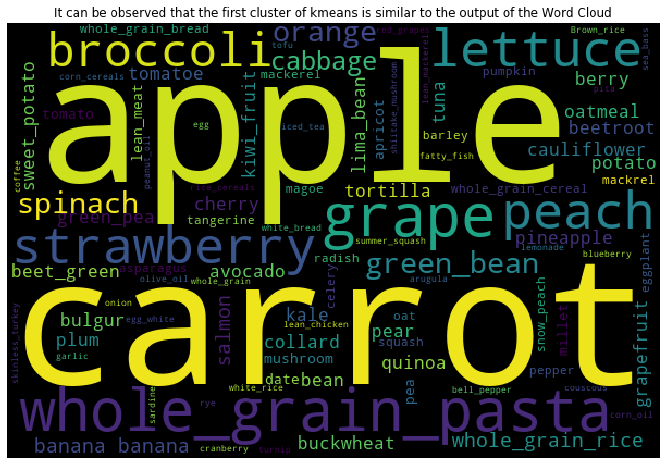

In [19]:
unique_string=(" ").join(datanew)
wordcloud = WordCloud(width = 600, height = 400).generate(unique_string)
plt.figure(figsize=(15,8))
plt.title("It can be observed that the first cluster of kmeans is similar to the output of the Word Cloud")
plt.imshow(wordcloud)
# Store to file
wordcloud.to_file("wordcloud-result.png")
plt.axis("off")
plt.show()
plt.close()